In [ ]:
# Code to investigate clustering in the prawn's mouth.
# Author: S.Spencer (samuel.spencer@physics.ox.ac.uk), Wetton Workshop 21/6/2018


In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits

In [2]:

def kill_duplicates(df,ID, sep):
    '''A function that kills duplciates in a pandas dataframe on a given separation column.
    Input:
        df (pandas dataframe): A pandas dataframe of the data you want to kill duplicates for.
        
        ID (str): The label of the ID column (i.e. KIC, 2MASS). This is used to find the duplicates.
        
        sep (str): The label of the separation column. This is used to cut the duplicates.
        
    Returns:
        df (pandas dataframe): The input pandas dataframe with duplicates killed.
    '''
    df = df.copy(deep=True)
    sel = df.duplicated(ID, keep=False)
    s = df[sel]
    for idx in range(s[ID].nunique()):
        subset = s[s[ID] == s[ID].values[idx]]
        lock = True  #Iterate and remove the target of largest separation
        while lock:
            if len(subset) > 1.:
                drop = subset[sep].idxmax()
                subset.drop(drop, inplace=True)
                s.drop(drop,inplace=True)
                df.drop(drop, inplace=True)
            elif len(subset == 1.):
                lock = False
            else:
                print('The code shouldnt be here?')
    return df


In [3]:


import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy import units as u
import astropy.coordinates as coord

from astropy.table import Table
dat = Table.read('kepler_dr2_1arcsec.fits', format='fits')
df=dat.to_pandas()

In [4]:
xmatch=pd.read_csv('MatchedData.csv',header=1,names=['designation','source_id','gaia_ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_primary_flag','duplicated_source','phot_g_mean_flux','phot_g_mean_flux_error','phot_g_mean_mag','phot_bp_mean_flux','phot_bp_mean_flux_error','phot_bp_mean_mag','phot_rp_mean_flux','phot_rp_mean_flux_error','phot_rp_mean_mag','bp_rp','bp_g','g_rp','radial_velocity','radial_velocity_error','phot_variable_flag','l','b','ecl_lon','ecl_lat','teff_val','teff_percentile_lower','teff_percentile_upper','a_g_val','a_g_percentile_lower','a_g_percentile_upper','e_bp_min_rp_val','e_bp_min_rp_percentile_lower','e_bp_min_rp_percentile_upper','radius_val','radius_percentile_lower','radius_percentile_upper','lum_val','lum_percentile_lower','lum_percentile_upper','kepid','ra_kic','dec_kic','r_est','r_lo','r_hi','r_length_prior','r_result_flag','r_modality_flag','tm_designation','kepmag','teff_1','teff_err1','teff_err2','teff_prov','logg','logg_err1','logg_err2','logg_prov','feh','feh_err1','feh_err2','feh_prov','radius','radius_err1','radius_err2','mass_1','mass_err1','mass_err2','prov_sec','nconfp','nkoi','ntce','jmag','hmag','kmag','planet?','kepler_gaia_ang_dist','KIC','Teff_2','log_g_','Mass_2','Prot','e_Prot','n_Prot','Rper','LPH','w','Ref','_RA','_DE','GroupID','GroupSize'])
print(xmatch)

                        designation            source_id  gaia_ref_epoch  \
0      Gaia DR2 2050246795316078336  2050246795316078336          2015.5   
1      Gaia DR2 2050233940470191872  2050233940470191872          2015.5   
2      Gaia DR2 2050232256840088960  2050232256840088960          2015.5   
3      Gaia DR2 2050232089348169856  2050232089348169856          2015.5   
4      Gaia DR2 2050235868919445248  2050235868919445248          2015.5   
5      Gaia DR2 2050232639104043904  2050232639104043904          2015.5   
6      Gaia DR2 2050231505232662272  2050231505232662272          2015.5   
7      Gaia DR2 2050237758705104896  2050237758705104896          2015.5   
8      Gaia DR2 2050237380747974016  2050237380747974016          2015.5   
9      Gaia DR2 2050190548423109248  2050190548423109248          2015.5   
10     Gaia DR2 2050237930503862016  2050237930503862016          2015.5   
11     Gaia DR2 2050238033583090688  2050238033583090688          2015.5   
12     Gaia 

In [5]:
for x in xmatch.columns:
    print(x)
print(xmatch.columns)
import matplotlib.pyplot as plt
%matplotlib inline

designation
source_id
gaia_ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_primary_flag
duplicated_source
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_mag
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_mag
phot_rp_mean_flux
phot_rp_mean_flux_error
phot_rp_mean_mag
bp_rp
bp_g
g_rp
radial_velocity
radial_velocity_error
phot_variable_flag
l
b
ecl_lon
ecl_lat
teff_val
teff_percentile_lower
teff_percentile_upper
a_g_val
a_g_percentile_lower
a_g_percentile_upper
e_bp_min_rp_val
e_bp_min_rp_percentile_lower
e_bp_min_rp_percentile_upper
radius_val
radius_percentile_lower
radius_percentile_upper
lum_val
lum_percentile_lower
lum_percentile_upper
kepid
ra_kic
dec_kic
r_est
r_lo

In [9]:
filtered=xmatch[xmatch['duplicated_source']==0]
filtered=filtered[(filtered['Prot']>10)]
filtered=filtered[filtered['teff_val'].notnull()]
filtered=filtered[filtered['teff_val']<4000]
filtered=filtered[filtered['r_est']>400]

[]

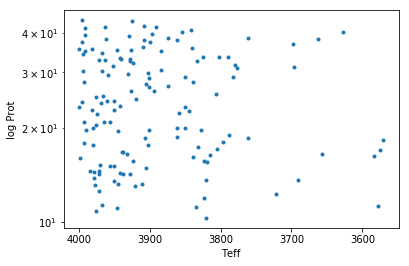

In [10]:
Teff=filtered['teff_val']
Rper=filtered['Prot']
dist=filtered['r_est']
#Rper=np.log10(Rper)
plt.scatter(Teff,Rper,marker='.')
#plt.xlim(6000,3000)
plt.gca().invert_xaxis()
plt.ylabel('log Prot')
plt.xlabel('Teff')
plt.semilogy()

In [11]:
from sklearn.cluster import MiniBatchKMeans, KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
noclust=2
coords=np.column_stack((Teff,Rper))
k_means = SpectralClustering(n_clusters=noclust,affinity='nearest_neighbors',assign_labels='kmeans',n_init=10)
labels=k_means.fit_predict(coords)
#k_means = KMeans(n_clusters=noclust)
#k_means.fit(coords)
#labels=k_means.predict(coords)
#k_means=DBSCAN(eps=40,min_samples=30)
#labels=k_means.fit_predict(coords)
#k_means=AgglomerativeClustering(n_clusters=noclust,linkage='ward')
#labels=k_means.fit_predict(coords)
#print(coords)



In [75]:
from matplotlib import colors as mcolors
import random
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from ipywidgets import widgets
from IPython.display import display
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.cm import get_cmap
vir=get_cmap(name='viridis')
from ipywidgets import *

t=np.arange(10,500,50)
global i
i=0
def update_fig(x):
    global i
    plt.xlim(4000,3000)
    plt.ylim(10,70)
    plt.semilogy()
    plt.ylabel('log Prot')
    plt.xlabel('Teff')

    filtered=xmatch[xmatch['duplicated_source']==0]
    filtered=filtered[(filtered['Prot']>10)]
    filtered=filtered[filtered['teff_val'].notnull()]
    filtered=filtered[filtered['teff_val']<4000]
    filtered=filtered[filtered['r_est']>x]
    oneoverTeff=1/filtered['teff_val'] #Need to do hyperbolic transform to do clustering
    Teff=filtered['teff_val']
    Rper=filtered['Prot']
    dist=filtered['r_est']
    coords=np.column_stack((oneoverTeff,Rper))
    k_means = SpectralClustering(n_clusters=noclust,affinity='nearest_neighbors',assign_labels='kmeans',n_init=10)
    labels=k_means.fit_predict(coords)
    plt.scatter(Teff, coords[:, 1],c=labels,cmap=vir,marker='.')
    plt.title('KMeans, cut='+str(x)+'Mpc')
    i=i+1
    plt.show()

w=interact(update_fig,x=widgets.IntSlider(min=0,max=500,step=50,value=0))
display(w)
#plt.xlim(4500,3000)


interactive(children=(IntSlider(value=0, description='x', max=500, step=50), Output()), _dom_classes=('widget-interact',))

<function __main__.update_fig>